## Non-Cartesian MRI With BART

This demo ([source](https://mrirecon.github.io/bart/examples.html)), showcases BART's ability to simuate non-cartesian sampling trajectories, generate representative phantoms, and reconstruct images using the non-uniform FFT (nuFFT)

In [35]:
import bartpy.tools as bart
from matplotlib import pyplot as plt

%matplotlib inline

In [36]:
# Generate a trajectory

traj_rad = bart.traj(r=True, x=512, y=64)

In [45]:
help(bart.ssa)

Help on function ssa in module bartpy.tools.tools:

ssa(src, w=None, z=None, m=None, n=None, r=None, g=None)
    Perform SSA-FARY or Singular Spectrum Analysis. <src>: [samples, coordinates]
    
        :param src array:
        :param w int: Window length 
        :param z CLEAR: Zeropadding [Default: True] 
        :param m int: Remove mean [Default: True] 
        :param n int: Normalize [Default: False] 
        :param r int: Rank for backprojection. r < 0: Throw away first r components. r > 0: Use only first r components. 
        :param g long: Bitmask for Grouping (long value!)



In [46]:
# Scale the trajectory

traj_rad2 = bart.scale(traj_rad, 0.5)

In [47]:
# Use the t (trajectory) option to simulate a phantom with a non-cartesian sampling trajectory

ksp_sim = bart.phantom(k=True, s=8, t=traj_rad2)

In [48]:
traj_rad2 = bart.scale(traj_rad, 0.6)

In [49]:
# inverse gridding

igrid = bart.nufft(traj_rad2, ksp_sim, i=True, t=True)

In [50]:
reco1 = bart.rss(igrid, 8)

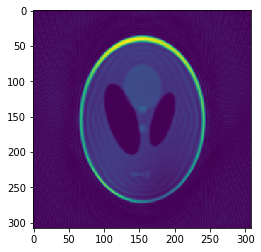

In [51]:
plt.imshow(abs(reco1))

In [52]:
lowres_img = bart.nufft(traj_rad2, ksp_sim, i=True, d=[24,24,1], t=True)
lowres_ksp = bart.fft(lowres_img, 7, u=True)

In [53]:
ksp_zerop = bart.resize(lowres_ksp, [0, 1], [308, 308], c=True)

In [54]:
sens = bart.ecalib(ksp_zerop, m=1)

In [55]:
reco2 = bart.pics(ksp_sim, sens, S=True, r=0.001, t=traj_rad2)

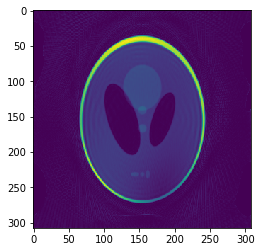

In [26]:
plt.imshow(abs(reco2))

In [57]:
import bartpy.italgos.italgos as iter

In [58]:
help(iter)

Help on module bartpy.italgos.italgos in bartpy.italgos:

NAME
    bartpy.italgos.italgos

DESCRIPTION
    # This file was automatically generated by SWIG (http://www.swig.org).
    # Version 4.0.2
    #
    # Do not make changes to this file unless you know what you are doing--modify
    # the SWIG interface file instead.

CLASSES
    builtins.object
        ist_data
        iter_nlop_s
        iter_op_data
        iter_op_p_s
        iter_op_s
    
    class ist_data(builtins.object)
     |  Methods defined here:
     |  
     |  __init__(self)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  __repr__ = _swig_repr(self)
     |  
     |  ----------------------------------------------------------------------
     |  Static methods defined here:
     |  
     |  __swig_destroy__ = delete_ist_data(...)
     |  
     |  ----------------------------------------------------------------------
     |  Data descriptors defined here:
     |  
     |  _